In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')

# Display the data table for preview
pyber_df.head()

# to get the count for validity checking
# Total = pyber_df["city"].count()
# print(Total)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# to get my head around the raw city data (120 records)
# city_data_df.head()

# to get the count for validity checking
# Total = city_data_df["city"].count()
# print(Total)

In [3]:
# to get my head around the raw ride data (2375 records)
# ride_data_df.head()

# to get the count for validity checking
# Total = ride_data_df["city"].count()
# print(Total)

In [4]:
# to check the combined data (shoudl have 2375 records and have the data from both df's)
pyber_df.head()
# Total = pyber_df["city"].count()
# print(Total)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

#Creates the group by city
city_group = pyber_df.groupby(["city"])


# Average Fare ($) Per City
average_fare_city = city_group["fare"].mean()
# average_fare_city.head()
# make the dataframe
average_fare_city_df = pd.DataFrame(average_fare_city)
# average_fare_city_df.head()


# Total Number of Rides Per City .value_counts()
total_Rides_city = city_group["ride_id"].count()
# average_Rides_city.head()
# make the dataframe
total_Rides_city_df = pd.DataFrame(total_Rides_city)

city_df = pd.merge(city_data_df,average_fare_city_df, on="city")
# city_df

city_df1 = pd.merge(city_df, total_Rides_city_df, on="city")
# city_df1

city_df1.head()

# this was to check to make sure that we had all the records we need (2375)
# Total = city_df1["city"].count()
# print(Total)

,city,driver_count,type,fare,ride_id
0,Richardfort,38,Urban,22.373214,28
1,Williamsstad,59,Urban,24.362174,23
2,Port Angela,67,Urban,23.836842,19
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,25.123871,31


In [6]:
# split into three tables by type for the bubble plot

#split out the urban data
urban_for_chart = (city_df1.query("type == 'Urban'"))
urban_for_chart_df = urban_for_chart[["city", "driver_count", "type", "fare", "ride_id"]]
urban_for_chart_df

#split out the Suburban data
Suburban_for_chart = (city_df1.query("type == 'Suburban'"))
Suburban_for_chart_df = Suburban_for_chart[["city", "driver_count", "type", "fare", "ride_id"]]
Suburban_for_chart_df

#split out the Rural data
Rural_for_chart = (city_df1.query("type == 'Rural'"))
Rural_for_chart_df = Rural_for_chart[["city", "driver_count", "type", "fare", "ride_id"]]
Rural_for_chart_df.head()
                                     

,city,driver_count,type,fare,ride_id
102,South Jennifer,7,Rural,35.264286,7
103,West Heather,4,Rural,33.890000,9
104,Newtonview,1,Rural,36.745000,4
105,North Holly,8,Rural,29.130000,9
106,Michaelberg,6,Rural,34.997500,12


## Bubble Plot of Ride Sharing Data

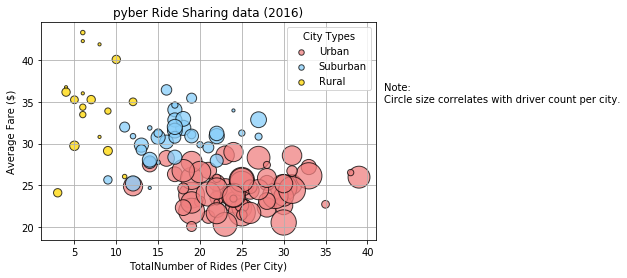

In [7]:
# Obtain the x and y coordinates for each of the three city types
plt.ylim(18.5,44.5)
plt.xlim(1,41)
# Build the scatter plots for each city types
x_axisu = urban_for_chart_df["ride_id"]
y_axisu = urban_for_chart_df["fare"]
x_axiss = Suburban_for_chart_df["ride_id"]
y_axiss = Suburban_for_chart_df["fare"]
x_axisr = Rural_for_chart_df["ride_id"]
y_axisr = Rural_for_chart_df["fare"]
dcu = urban_for_chart_df["driver_count"]
dcs = Suburban_for_chart_df["driver_count"]
dcr = Rural_for_chart_df["driver_count"]

# set the colors
urban = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
suburban = plt.scatter(x_axiss, y_axiss, marker="o", facecolors="lightskyblue",edgecolors="black", s=10*dcs, alpha=0.75)
rural = plt.scatter(x_axisr, y_axisr, marker="o", facecolors="gold",edgecolors="black", s=10*dcr, alpha=0.75)
plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("pyber Ride Sharing data (2016)")
plt.xlabel("TotalNumber of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42, 35, "Note: \nCircle size correlates with driver count per city.")


# create and size the ledgend
lgnd= plt.legend(["Urban", "Suburban", "Rural"], loc=1, markerscale = .5, title="City Types")
# this part makes all the dots in teh legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size

#save the file
plt.savefig("../Images/pyber_Ride_Sharing_data.jpg", bbox_inches="tight")

In [8]:
# Show plot
plt.show()

## Total Fares by City Type

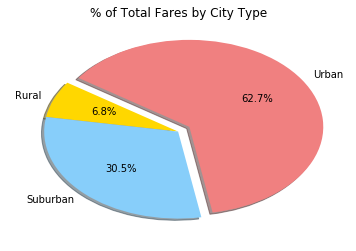

In [9]:
# Calculate Type Percents
totalfares = len(pyber_df["fare"].unique())
totalfares

# total up the fares for Urban and then devide by totalfares to get the %
fares_u = (pyber_df.query("type =='Urban'"))
faresu = fares_u["fare"].sum()
pfu = faresu / totalfares

# total up the fares for Rural and then devide by totalfares to get the %
fares_r = (pyber_df.query("type =='Rural'"))
faresr = fares_r["fare"].sum()
pfr = faresr / totalfares

# total up the fares for Suburban and then devide by totalfares to get the %
fares_s = (pyber_df.query("type =='Suburban'"))
faress = fares_s["fare"].sum()
pfs = faress / totalfares

# Build Pie Chart
plt.title("% of Total Fares by City Type")
labels = ["Urban", "Rural", "Suburban"]
sizes = [pfu, pfr, pfs]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure
plt.savefig("../Images/Percent_of_Total_Fares_by_City_Type.jpg")

In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

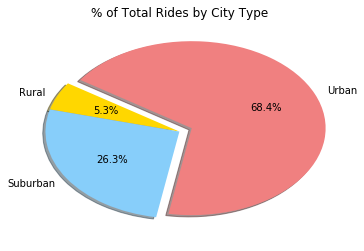

In [11]:
# Calculate Ride Percents

# let's get the title out of the way now
plt.title("% of Total Rides by City Type")

#get the unique ride ides
totalcity = len(pyber_df["ride_id"].unique())
totalcity

# total up the rids per city for Urban and then devide by totalcity to get the %
totalu = len(pyber_df.query("type =='Urban'"))
pu = totalu / totalcity

# total up the rids per city for Suburban and then devide by totalcity to get the %
totals = len(pyber_df.query("type =='Suburban'"))
ps = totals / totalcity

# total up the rids per city for Rural and then devide by totalcity to get the %
totalr = len(pyber_df.query("type =='Rural'"))
pr = totalr / totalcity

# Build Pie Chart
explode = (0.1,0,0)
labels = ["Urban", "Rural", "Suburban"]
sizes = [pu, pr, ps]
colors = ["lightcoral", "gold", "lightskyblue"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=260)


# Save Figure
plt.savefig("../Images/Percent_of_Total_Rides_by_City_Type.jpg")

In [12]:
# Show Figure
plt.show()

## Total Drivers by City Type

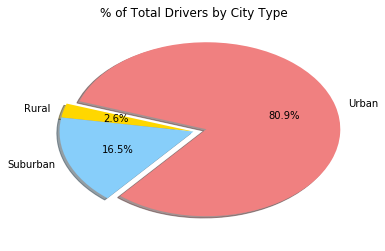

In [13]:
# Calculate Driver Percents

# let's get the title out of the way now
plt.title("% of Total Drivers by City Type")

#get the total number of drivers
totaldrivers = city_df1["driver_count"].sum()
totaldrivers

# total up the drivers per city for Urban and then devide by totaldrivers to get the %
totaldu = city_df1.query("type =='Urban'")
totald_u = totaldu["driver_count"].sum()
pdu = totald_u / totaldrivers

# total up the drivers per city for Suburban and then devide by totaldrivers to get the %
totalds = city_df1.query("type =='Suburban'")
totald_s = totalds["driver_count"].sum()
pds = totald_s / totaldrivers

# total up the drivers per city for Rural and then devide by totaldrivers to get the %
totaldr = city_df1.query("type =='Rural'")
totald_r = totaldr["driver_count"].sum()
pdr = totald_r / totaldrivers

# Build Pie Chart
explode = (0.1,0,0)
labels = ["Urban", "Rural", "Suburban"]
sizes = [pdu, pdr, pds]
colors = ["lightcoral", "gold", "lightskyblue"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=230)


# Save Figure
plt.savefig("../Images/Percent_of_Total_Drivers_by_City_Type.jpg")

In [14]:
# Show Figure
plt.show()